In [528]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from scipy.optimize import curve_fit
from scipy.fft import fft, ifft, fftfreq

In [578]:
T = 32       
N = 15

a = 300 #mVpp
b = 200 #mVpp
tau = 336 #seconds
f = 3.5312
omega = 2*np.pi*f

print(f'Q = {np.pi*f*tau}')

Q = 3727.4469047277094


In [579]:
lines = 1600
res = 51/lines
sample_freq = res * (2 * lines)
sample_time = 1/sample_freq
res

0.031875

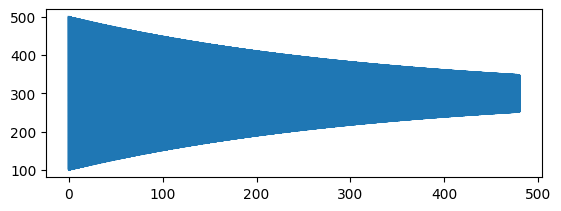

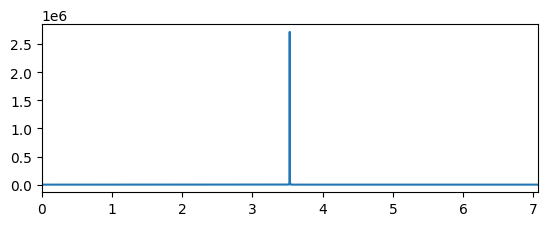

In [580]:
sample = np.arange(0, N*T, sample_time)

signal = (b*np.exp(-sample/tau))*np.cos(omega * sample) + a + 0*np.random.normal(0,5, size = len(sample))
# signal = np.cos(omega * sample)


plt.subplot(211)
plt.plot(sample, signal)
plt.show()

plt.subplot(212)
(freq, Spec) = scipy.signal.periodogram(signal, sample_freq, scaling='density')
plt.plot(freq, Spec)
plt.xlim(0, 2*f)
plt.show()

In [581]:
# now simulate the value of the FFT after every T seconds
sim_8 = []
sim_16 = []
sim_32 = []

N8 = 40
N16 = 25
N32 = 15


T8 = [i*8 for i in range(1,N8)]
T16 = [i*16 for i in range(1,N16)]
T32 = [i*32 for i in range(1,N32)]


for i in range(1,N8):
    cut_8 = ((i-1) * 8 < sample) & (sample < i*8)
    (freq8, Spec8) = scipy.signal.periodogram(signal[cut_8], sample_freq, scaling='density')
    sim_8.append(Spec8.max())

for i in range(1, N16):
    cut_16 = ((i-1) * 16 < sample) & (sample < i*16)
    (freq16, Spec16) = scipy.signal.periodogram(signal[cut_16], sample_freq, scaling='density')
    sim_16.append(Spec16.max())

for i in range(1, N32):
    cut_32 = ((i-1) * 32 < sample) & (sample < i*32)
    (freq32, Spec32) = scipy.signal.periodogram(signal[cut_32], sample_freq, scaling='density')
    sim_32.append(Spec32.max())

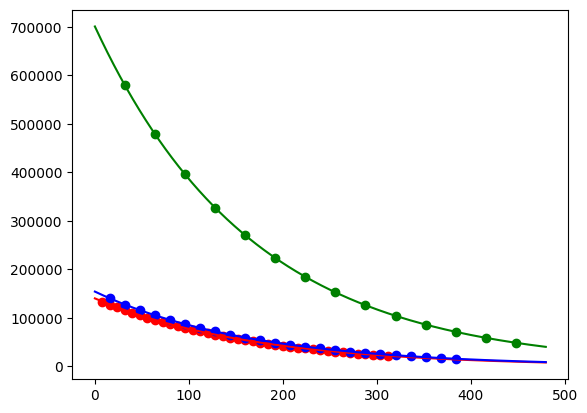

In [582]:
def fitfunc(x, a, b, tau):
    return a + b*np.exp(-x/tau)

b = 100000

val8, err8 = curve_fit(fitfunc, T8, sim_8, p0 = [a,b,tau])
val16, err16 = curve_fit(fitfunc, T16, sim_16, p0 = [a,b,tau])
val32, err32 = curve_fit(fitfunc, T32, sim_32, p0 = [a,b,tau])


plt.scatter(T8, sim_8, color = 'red')
plt.plot(sample, fitfunc(sample,*val8), color = 'red')

plt.scatter(T16, sim_16, color = 'blue')
plt.plot(sample, fitfunc(sample,*val16), color = 'blue')

plt.scatter(T32, sim_32, color = 'green')
plt.plot(sample, fitfunc(sample,*val32), color = 'green');


In [583]:
print(f'Tau (8sec) = {val8[2]} s')
print(f'Tau (16sec) = {val16[2]} s')
print(f'Tau (32sec) = {val32[2]} s')

Tau (8sec) = 167.99332685391263 s
Tau (16sec) = 168.00052393276536 s
Tau (32sec) = 168.00241786320078 s


# Test from oscilloscope

In [596]:
N = 20
time = [i*32 for i in range(N)]
V_array = []
i = 0

while(i<20):
    value = input('Insert Voltage Value: ')
    if value != ' ':
        V_array.append(float(value))
        i += 1

Insert Voltage Value: 580
Insert Voltage Value: 530
Insert Voltage Value: 500
Insert Voltage Value: 460
Insert Voltage Value: 430
Insert Voltage Value: 380
Insert Voltage Value: 360
Insert Voltage Value:  
Insert Voltage Value: 340
Insert Voltage Value: 300
Insert Voltage Value: 280
Insert Voltage Value: 260
Insert Voltage Value: 240
Insert Voltage Value: 230
Insert Voltage Value: 220
Insert Voltage Value: 220
Insert Voltage Value: 200
Insert Voltage Value: 200
Insert Voltage Value: 190
Insert Voltage Value: 180
Insert Voltage Value:  
Insert Voltage Value: 180


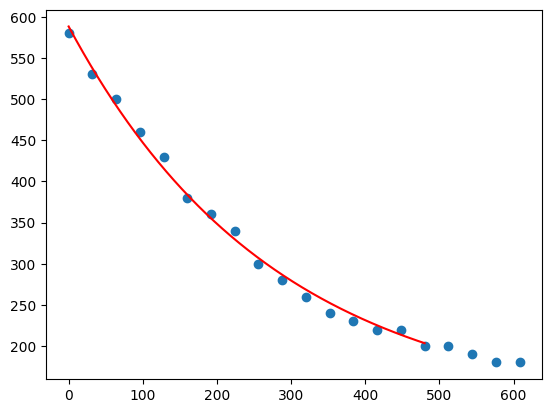

In [597]:
val_osc, err_osc = curve_fit(fitfunc, time, V_array, p0 = [a,b,tau])
plt.plot(sample, fitfunc(sample,*val_osc), color = 'red')
plt.scatter(time, V_array)

In [600]:
Q = val_osc[2]*f*np.pi
Q

3097.8178272116215